In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp, solve_bvp
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import math

In [2]:
c_f = 1
c_r = 1
c_l = 1

left_turn_gap_constant = 1.15

addition_f = .2
addition_r = .2
addition_l = .04

def light_north_south(t):
    if(t % (2*np.pi) < np.pi / 6):
        return np.sin(3*t)
    elif(t % (2*np.pi) < 5*np.pi / 6):
        return 1
    elif(t % (2*np.pi) < np.pi):
        return np.sin(3*t)
    else:
        return 0

def light_east_west(t):
    if(t % (2*np.pi) > 11 * np.pi / 6):
        return -1 * np.sin(3*t)
    elif(t % (2*np.pi) > 7*np.pi / 6):
        return 1
    elif(t % (2*np.pi) > np.pi):
        return -1 * np.sin(3*t)
    else:
        return 0

def no_increase_ode(t,y):
        change_north_forward = -1 * c_f * light_north_south(t)
        change_east_forward = -1 * c_f * light_east_west(t)
        change_south_forward = -1 * c_f * light_north_south(t)
        change_west_forward = -1 * c_f * light_east_west(t)

        change_north_left = -1 * c_l * light_north_south(t) * ((left_turn_gap_constant * c_f) + change_south_forward)
        change_east_left = -1 * c_l * light_east_west(t) * ((left_turn_gap_constant * c_f) + change_west_forward)
        change_south_left = -1 * c_l * light_north_south(t) * ((left_turn_gap_constant * c_f) + change_north_forward)
        change_west_left = -1 * c_l * light_east_west(t) * ((left_turn_gap_constant * c_f) + change_east_forward)

        change_north_right = -1 * c_r * (c_f + change_west_forward)
        change_east_right = -1 * c_r * (c_f + change_south_forward)
        change_south_right = -1 * c_r * (c_f + change_east_forward)
        change_west_right = -1 * c_r * (c_f + change_north_forward)


        return np.array(
            [change_north_forward + addition_f,
            change_north_right + addition_r,
            change_north_left + addition_l,
            change_east_forward + addition_f,
            change_east_right + addition_r,
            change_east_left + addition_l,
            change_south_forward + addition_f,
            change_south_right + addition_r,
            change_south_left + addition_l,
            change_west_forward + addition_f,
            change_west_right + addition_r,
            change_west_left + addition_l,
            ])

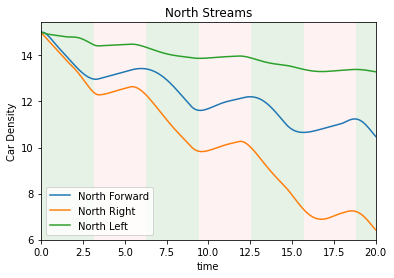

In [9]:
t0 = 0
tf = 20
t_vals = np.linspace(t0, tf, 500)
y0 = np.ones(12) * 15
sol = solve_ivp(no_increase_ode, (t0,tf), y0, t_eval=t_vals)

plt.plot(sol.t,sol.y[0], label="North Forward")
plt.plot(sol.t,sol.y[1], label="North Right")
plt.plot(sol.t,sol.y[2], label="North Left")
plt.xlabel('time')
plt.ylabel('Car Density')

for i in range(0, 4):
    plt.axvspan((2*i)*np.pi, ((2*i)+1)*np.pi, facecolor='g', alpha=0.1)
    plt.axvspan(((2*i)+1)*np.pi, ((2*i)+2)*np.pi, facecolor='r', alpha=0.05)

plt.xlim(0,20)
plt.title("North Streams")

plt.legend()
plt.savefig("north_streams")
plt.show()

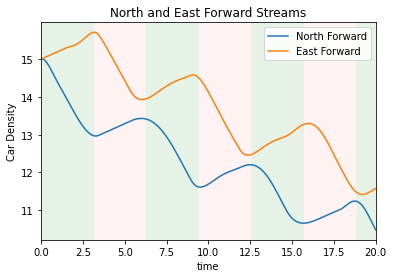

In [7]:
t0 = 0
tf = 20
t_vals = np.linspace(t0, tf, 1000)
y0 = np.ones(12) * 15
sol = solve_ivp(no_increase_ode, (t0,tf), y0, t_eval=t_vals)

plt.plot(sol.t,sol.y[0], label="North Forward")
plt.plot(sol.t,sol.y[3], label="East Forward")
plt.xlabel('time')
plt.ylabel('Car Density')

for i in range(0, 4):
    plt.axvspan((2*i)*np.pi, ((2*i)+1)*np.pi, facecolor='g', alpha=0.1)
    plt.axvspan(((2*i)+1)*np.pi, ((2*i)+2)*np.pi, facecolor='r', alpha=0.05)

plt.xlim(0,20)
plt.title("North and East Forward Streams")
plt.savefig("north_east_forward")
plt.legend()
plt.show()

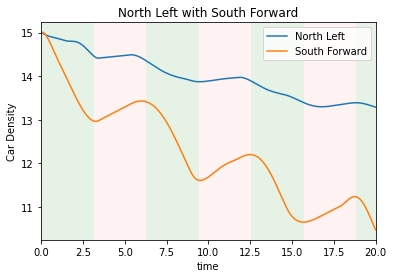

In [8]:
t0 = 0
tf = 20
t_vals = np.linspace(t0, tf, 500)
y0 = np.ones(12) * 15
sol = solve_ivp(no_increase_ode, (t0,tf), y0, t_eval=t_vals)

plt.plot(sol.t,sol.y[2], label="North Left")
plt.plot(sol.t,sol.y[6], label="South Forward")
plt.xlabel('time')
plt.ylabel('Car Density')

for i in range(0, 4):
    plt.axvspan((2*i)*np.pi, ((2*i)+1)*np.pi, facecolor='g', alpha=0.1)
    plt.axvspan(((2*i)+1)*np.pi, ((2*i)+2)*np.pi, facecolor='r', alpha=0.05)

plt.xlim(0,20)
plt.title("North Left with South Forward")
plt.savefig("north_left_with_south")

plt.legend()
plt.show()